In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [4]:
df = pd.read_csv('eda_data.csv')

In [11]:
# A very small data as I collected it myself but we can make it bigger by collecting more data
df.shape

(110, 24)

In [5]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'monthly',
       'hourly', 'Salary', 'company_txt', 'Age', 'Python', 'Deep Learning',
       'Spark', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [7]:
# Selecting the relevant columns
df_model = df[['Salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','hourly','monthly',
             'Location','Age','Python','Spark','Deep Learning','job_simp','seniority','desc_len']]


In [8]:
# Get Dummy data
df_dum = pd.get_dummies(df_model)

In [9]:
df_dum.head()

,Salary,Rating,hourly,monthly,Age,Python,Spark,Deep Learning,desc_len,Size_1 to 50 Employees,...,Location_Remote,Location_Rājkot,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_manager,job_simp_mle,job_simp_na,seniority_na,seniority_senior
0,996452.0,-1.0,0,0,-1.0,1,0,0,1618,0,...,0,0,0,0,1,0,0,0,1,0
1,566099.0,3.9,0,0,41.0,1,1,0,1718,0,...,0,0,0,0,1,0,0,0,1,0
2,11520000.0,3.9,0,1,25.0,1,0,0,3100,1,...,0,0,0,0,1,0,0,0,0,1
3,3960000.0,-1.0,0,1,-1.0,0,0,0,188,0,...,0,0,0,0,0,0,0,1,1,0
4,812637.0,3.9,0,0,41.0,0,0,0,1572,0,...,0,0,0,0,0,0,0,1,1,0


In [12]:
# train test split 
from sklearn.model_selection import train_test_split

In [14]:
X = df_dum.drop('Salary', axis =1)
y = df_dum.Salary.values

In [15]:
# We are doing a 80 20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# multiple linear regression using statsmodels 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     10.43
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           2.72e-14
Time:                        07:43:47   Log-Likelihood:                -1609.6
No. Observations:                 110   AIC:                             3343.
Df Residuals:                      48   BIC:                             3511.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -1.164e+05   4.11e+05     -0.283      0.778   -9.42e+05     7.1e+05
Rating                                           -2.773e+05   4.47e+05     -0.620      0.538   -1.18e+06    6.22e+05
hourly                                            7.785e+05   1.92e+06      0.406      0.687   -3.08e+06    4.64e+06
monthly                                           8.339e+06   6.69e+05     12.463      0.000    6.99e+06    9.68e+06
Age                                              -4019.8913   6307.420     -0.637      0.527   -1.67e+04    8662.027
Python                                             3.01e+05   4.25e+05      0.708      0.483   -5.54e+05    1.16e+06
Spark                                            -5.568e+05   4.09e+05     -1.362      0.180   -1.38e+06    2.65e+05
Deep Learning                                    -5.576e+05   5.83e+05     -0.957      0.343   -1.73e+06    6.14e+05
desc_len                                           131.4632    100.450      1.309      0.197     -70.505     333.431
Size_1 to 50 Employees                           -3.631e+05   1.02e+06     -0.356      0.724   -2.42e+06    1.69e+06
Size_10000+ Employees                              1.32e+05   1.58e+06      0.084      0.934   -3.04e+06     3.3e+06
Size_1001 to 5000 Employees                       1.499e+06   1.64e+06      0.913      0.366    -1.8e+06     4.8e+06
Size_201 to 500 Employees                        -2.938e+05   1.62e+06     -0.182      0.856   -3.54e+06    2.95e+06
Size_51 to 200 Employees                         -1.013e+05   1.54e+06     -0.066      0.948   -3.21e+06       3e+06
Size_Unknown                                      4.482e+05   1.54e+06      0.291      0.772   -2.64e+06    3.54e+06
Type of ownership_Company - Private               3.753e+05   7.45e+05      0.504      0.617   -1.12e+06    1.87e+06
Type of ownership_Company - Public               -4.665e+05   8.98e+05     -0.520      0.606   -2.27e+06    1.34e+06
Type of ownership_Private Practice / Firm         1.336e+05    1.4e+06      0.095      0.924   -2.68e+06    2.95e+06
Type of ownership_Subsidiary or Business Segment -1.042e+06    1.2e+06     -0.870      0.389   -3.45e+06    1.37e+06
Type of ownership_Unknown                          2.32e+06   3.05e+06      0.760      0.451   -3.82e+06    8.46e+06
Industry_Accounting & Tax                          -3.8e+05   1.32e+06     -0.288      0.774   -3.03e+06    2.27e+06
Industry_Banking & Lending                        7.523e+05    1.2e+06      0.627      0.533   -1.66e+06    3.16e+06
Industry_Business Consulting                     -1.137e+06   1.42e+06     -0.803      0.426   -3.98e+06    1.71e+06
Industry_Computer Hardware Development   

In [22]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 2))

-970584.5780416366

/home/avishek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132225009145.46564, tolerance: 27258673653.186127
  model = cd_fast.enet_coordinate_descent(
/home/avishek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74366532389.4021, tolerance: 12226384007.924824
  model = cd_fast.enet_coordinate_descent(
/home/avishek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73889168215.05151, tolerance: 12226384007.924824
  model = cd_fast.enet_coordinate_descent(
/home/avishek/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coord

,alpha,error
98,0.99,-1.049897e+06


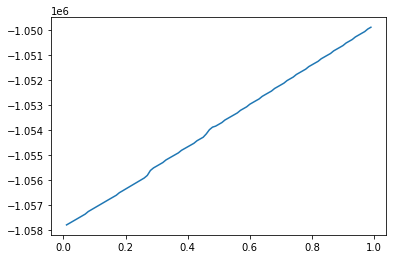

In [23]:
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [25]:
# Random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-534799.6912988506

In [26]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=160)

In [27]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[2.6,
 0.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 2293.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0]